# Preprocessing of data

### Importings

In [2]:
import pandas as pd
import matplotlib.pyplot as pyplot

C:\Users\vanbo\AppData\Local\Temp\ipykernel_22296\2884498329.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Print length of dataset and first 10 rows of the data

In [3]:
data = pd.read_csv('train.csv')
originalLength = len(data)

In [4]:
print("Original størrelse på datasettet:")
print(originalLength)
data.head(10)

Original størrelse på datasettet:
1710670


,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."
5,1372636965620000231,C,NaN,NaN,20000231,1372636965,A,False,"[[-8.615502,41.140674],[-8.614854,41.140926],[..."
6,1372637210620000456,C,NaN,NaN,20000456,1372637210,A,False,"[[-8.57952,41.145948],[-8.580942,41.145039],[-..."
7,1372637299620000011,C,NaN,NaN,20000011,1372637299,A,False,"[[-8.617563,41.146182],[-8.617527,41.145849],[..."
8,1372637274620000403,C,NaN,NaN,20000403,1372637274,A,False,"[[-8.611794,41.140557],[-8.611785,41.140575],[..."
9,1372637905620000320,C,NaN,NaN,20000320,1372637905,A,False,"[[-8.615907,41.140557],[-8.614449,41.141088],[..."


### Removing unwanted rows from dataset

Remove all columns with MISSING_DATA=True. Because we only want the trips that do not miss any datapoint

In [5]:
data = data[data['MISSING_DATA']!=True]

In [6]:
print("New length of dataset:")
newLength1 = len(data)
print(newLength1)

print("Number of removed rows:")
print(originalLength - len(data))

New length of dataset:
1710660
Number of removed rows:
10


### Removing columns that we do not need anymore: 
ORIGIN_CALL, ORIGIN_STAND, TAXI_ID and MISSING_DATA (already used the info we needed from this column).

In [7]:
data.drop(['ORIGIN_CALL', 'ORIGIN_STAND', 'TAXI_ID', 'MISSING_DATA'], axis=1, inplace=True)
data.head(10)

,TRIP_ID,CALL_TYPE,TIMESTAMP,DAY_TYPE,POLYLINE
0,1372636858620000589,C,1372636858,A,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,1372637303,A,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,1372636951,A,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,1372636854,A,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,1372637091,A,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."
5,1372636965620000231,C,1372636965,A,"[[-8.615502,41.140674],[-8.614854,41.140926],[..."
6,1372637210620000456,C,1372637210,A,"[[-8.57952,41.145948],[-8.580942,41.145039],[-..."
7,1372637299620000011,C,1372637299,A,"[[-8.617563,41.146182],[-8.617527,41.145849],[..."
8,1372637274620000403,C,1372637274,A,"[[-8.611794,41.140557],[-8.611785,41.140575],[..."
9,1372637905620000320,C,1372637905,A,"[[-8.615907,41.140557],[-8.614449,41.141088],[..."


# Create subsets

### Create subset 1 (size 50)

In [11]:
subset1 = data.sample(n=50, replace=False)

In [9]:
subset1.head(10)

,TRIP_ID,CALL_TYPE,TIMESTAMP,DAY_TYPE,POLYLINE
728872,1386188121620000080,C,1386188121,A,"[[-8.613333,41.143329]]"
986865,1391173965620000523,C,1391173965,A,"[[-8.609625,41.160411],[-8.609625,41.160402],[..."
954739,1390494518620000086,C,1390494518,A,"[[-8.568378,41.167566]]"
984857,1391149049620000254,C,1391149049,A,"[[-8.602443,41.155668],[-8.602623,41.155236],[..."
1188197,1394922832620000361,C,1394922832,A,"[[-8.61561,41.140647],[-8.61525,41.141016],[-8..."
1491573,1400446229620000670,B,1400446229,A,"[[-8.614062,41.141052],[-8.614251,41.141034],[..."
869458,1388685296620000529,C,1388685296,A,"[[-8.648037,41.154966],[-8.648838,41.154804],[..."
760885,1386770599620000267,C,1386770599,A,"[[-8.630712,41.153949],[-8.630703,41.153859],[..."
1618005,1402579016620000197,A,1402579016,A,"[[-8.601255,41.181768],[-8.601264,41.181804],[..."
1561421,1401640725620000508,C,1401640725,A,"[[-8.597601,41.147802],[-8.597934,41.148126],[..."


# Check subset for statistical significance

### Printing the histograms of each variable, both for the original dataset and the subset.

CALL_TYPE:

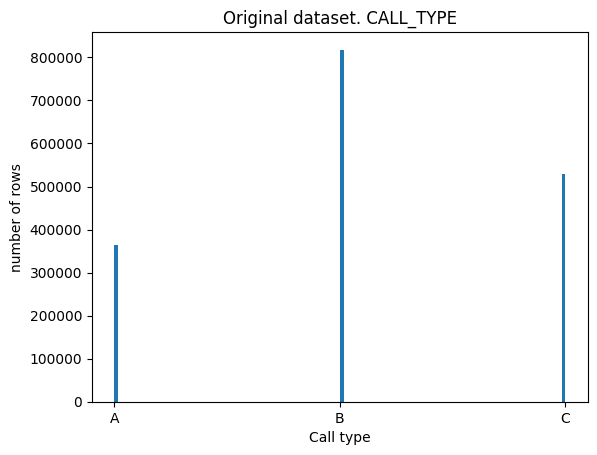

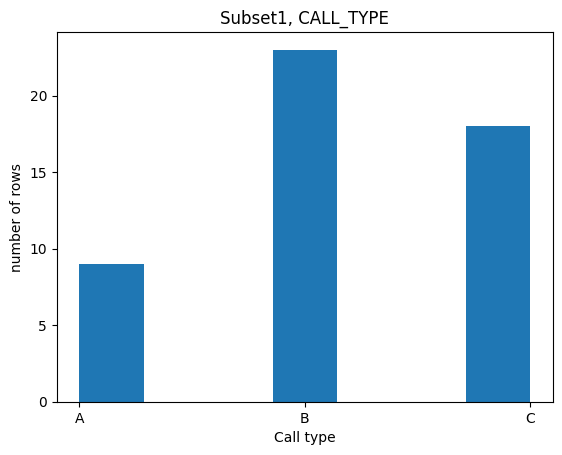

In [12]:
data_sorted = data.sort_values(by='CALL_TYPE')
subset1_sorted = subset1.sort_values(by='CALL_TYPE')

pyplot.hist(data_sorted['CALL_TYPE'], bins='auto')
pyplot.xlabel('Call type')
pyplot.ylabel('number of rows')
pyplot.title('Original dataset. CALL_TYPE')
pyplot.show()

pyplot.hist(subset1_sorted['CALL_TYPE'], bins='auto')
pyplot.xlabel('Call type')
pyplot.ylabel('number of rows')
pyplot.title('Subset1, CALL_TYPE')
pyplot.show()

In [14]:
#regne ut tall for CALL_TYPE
# if tall>threshold
    #regne ut tall for ....
    #if tall>threshold
        #regne ut....
#else
#velge nye random trajectories